In [57]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
# 외부에서 데이터 불러오기
file_path = 'C:/k_digital/Sourcce/data/chipotle.csv'
chipo = pd.read_csv(file_path)
print(type(chipo))

<class 'pandas.core.frame.DataFrame'>


In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
chipo.sample(5)

,order_id,quantity,item_name,choice_description,item_price
3953,1585,1,Steak Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chi...",$8.99
4543,1806,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]",$8.75
1834,742,1,Side of Chips,NaN,$1.69
2199,887,1,Bottled Water,NaN,$1.50
2369,943,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.75


In [16]:
# 0. 가격의 달러 제거후 실수화
chipo['price'] = chipo.item_price[:]
chipo.head()
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [32]:
# $제거하는 과정
chipo.iloc[0,5][1:]
x = []
for i in range(4622):
    a = chipo.iloc[i,5][1:]
    x.append(a)
x

['2.39 ',
 '3.39 ',
 '3.39 ',
 '2.39 ',
 '16.98 ',
 '10.98 ',
 '1.69 ',
 '11.75 ',
 '9.25 ',
 '9.25 ',
 '4.45 ',
 '8.75 ',
 '8.75 ',
 '11.25 ',
 '4.45 ',
 '2.39 ',
 '8.49 ',
 '8.49 ',
 '2.18 ',
 '8.75 ',
 '4.45 ',
 '8.99 ',
 '3.39 ',
 '10.98 ',
 '3.39 ',
 '2.39 ',
 '8.49 ',
 '8.99 ',
 '1.09 ',
 '8.49 ',
 '2.39 ',
 '8.99 ',
 '1.69 ',
 '8.99 ',
 '1.09 ',
 '8.75 ',
 '8.75 ',
 '4.45 ',
 '2.95 ',
 '11.75 ',
 '2.15 ',
 '4.45 ',
 '11.25 ',
 '11.75 ',
 '8.75 ',
 '10.98 ',
 '8.99 ',
 '3.39 ',
 '8.99 ',
 '3.99 ',
 '8.99 ',
 '2.18 ',
 '10.98 ',
 '1.09 ',
 '8.99 ',
 '2.39 ',
 '9.25 ',
 '11.25 ',
 '11.75 ',
 '2.15 ',
 '4.45 ',
 '9.25 ',
 '11.25 ',
 '8.75 ',
 '8.99 ',
 '8.99 ',
 '3.39 ',
 '8.99 ',
 '10.98 ',
 '8.99 ',
 '1.69 ',
 '8.99 ',
 '3.99 ',
 '8.75 ',
 '4.45 ',
 '8.75 ',
 '8.75 ',
 '2.15 ',
 '8.75 ',
 '11.25 ',
 '2.15 ',
 '9.25 ',
 '8.75 ',
 '8.75 ',
 '9.25 ',
 '8.49 ',
 '8.99 ',
 '1.09 ',
 '9.25 ',
 '2.95 ',
 '11.75 ',
 '11.75 ',
 '9.25 ',
 '11.75 ',
 '4.45 ',
 '9.25 ',
 '4.45 ',
 '11.75 ',
 

In [34]:
# $제거후 타입확인
chipo['price'] = x
chipo.sample()
print(type(chipo['price']))

<class 'pandas.core.series.Series'>


In [42]:
# 문자형 자료를 실수형으로 바꾸는 작업
chipo['price'] = chipo['price'].astype(np.float32)

In [43]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   price               4622 non-null   float32
dtypes: float32(1), int64(2), object(3)
memory usage: 198.7+ KB


In [22]:
#1. 메뉴가 주문된 건수
chipo.groupby('item_name').count()[['quantity']]

,quantity
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [23]:
#2. 메뉴와 사이드 메뉴 조합
chipo.groupby(['item_name','choice_description']).count()[['quantity']]

quantity
item_name         choice_description                                          
6 Pack Soft Drink [Coke]                                                    21
                  [Diet Coke]                                               24
                  [Lemonade]                                                 2
                  [Nestea]                                                   2
                  [Sprite]                                                   5
...                                                                        ...
Veggie Soft Tacos [Fresh Tomato Salsa, [Black Beans, Cheese, Sour...         1
                  [Fresh Tomato Salsa, [Fajita Vegetables, Rice, ...         1
                  [Roasted Chili Corn Salsa (Medium), [Black Bean...         1
                  [Roasted Chili Corn Salsa, [Fajita Vegetables, ...         1
                  [Tomatillo Red Chili Salsa, [Fajita Vegetables,...         1

[1859 rows x 1 columns]

In [61]:
#3 가장 비싼 메뉴는, 메뉴 수량이 1개일 떄 가격을 뽑아오는거지.
a = chipo.loc[chipo.quantity==1].groupby('item_name').max()[['price']]
a.sample()

,price
item_name,
Chicken Salad Bowl,11.25


In [59]:
a.count()

price    50
dtype: int64

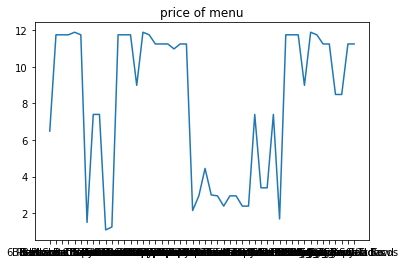

In [63]:
plt.plot(a)
plt.title('price of menu')
plt.show()

In [69]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98
6,3,1,Side of Chips,NaN,$1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,9.25


In [70]:
#4. 고객별 평균 사용금액
cost = chipo.groupby('order_id')[['price']].mean() 
cost.head()

,price
order_id,
1,2.890
2,16.980
3,6.335
4,10.500
5,6.850


In [68]:
#5. 전체 고객들의 평균 사용액
cost.mean() 

,price
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


In [84]:
#5-1. 고객별 평균이용 금액이 가장 큰 고객
cost.max() # 이거는 고객별 평균을 낸 금액 중에서

price    35.25
dtype: float32

In [82]:
#5-2. 이용금액이 가장 큰 고객
chipo[['price']].max()
chipo.loc[chipo.price == 44.25]

,order_id,quantity,item_name,choice_description,item_price,price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25


In [85]:
#6. 고객들의 방문 횟수?
chipo.groupby('order_id').size()


order_id
1       4
2       1
3       2
4       2
5       2
       ..
1830    2
1831    3
1832    2
1833    2
1834    3
Length: 1834, dtype: int64

In [86]:
#6-1. 평균 방문횟수
chipo.groupby('order_id').size().mean()

2.520174482006543

In [87]:
#6-2. 가장 많이 방문한 횟수
chipo.groupby('order_id').size().max()

23

In [88]:
#7. 한번에 가장 많이 주문한 메뉴의 수량
chipo.groupby('quantity').size()

quantity
1     4355
2      224
3       28
4       10
5        1
7        1
8        1
10       1
15       1
dtype: int64

In [89]:
#7-1. 한번에 가장 많이 시킨 음식은
chipo[chipo.quantity == 15]

,order_id,quantity,item_name,choice_description,item_price,price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,44.25


In [99]:
#8. 가장 많이 주문한 메뉴
chipo.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [103]:
chipo.pivot('item_name','choice_description','quantity')

ValueError: Index contains duplicate entries, cannot reshape

pandas.core.frame.DataFrame